In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

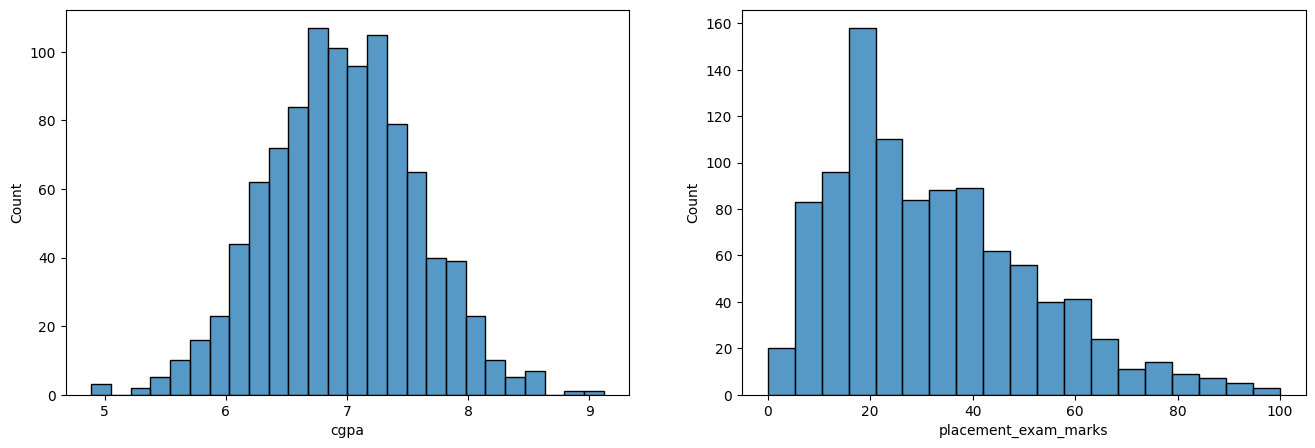

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'])

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()

In [16]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [18]:
df['placement_exam_marks'].skew()

0.8356419499466834

<AxesSubplot:>

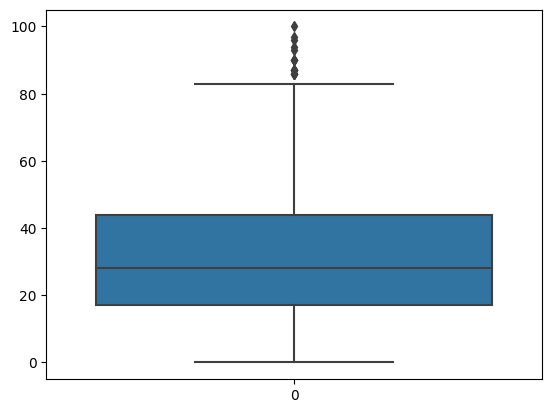

In [20]:
sns.boxplot(df['placement_exam_marks'])

In [23]:
pern_25 = df['placement_exam_marks'].quantile(0.25)
pern_75 = df['placement_exam_marks'].quantile(0.75)

In [24]:
print(pern_25,pern_75)

17.0 44.0


In [28]:
iqr = pern_75 - pern_25
iqr

27.0

In [29]:
upper_limit = pern_75 + 1.5 * iqr
lower_limit = pern_25 - 1.5 * iqr

In [30]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [31]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming

In [32]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [33]:
new_df.shape

(985, 3)

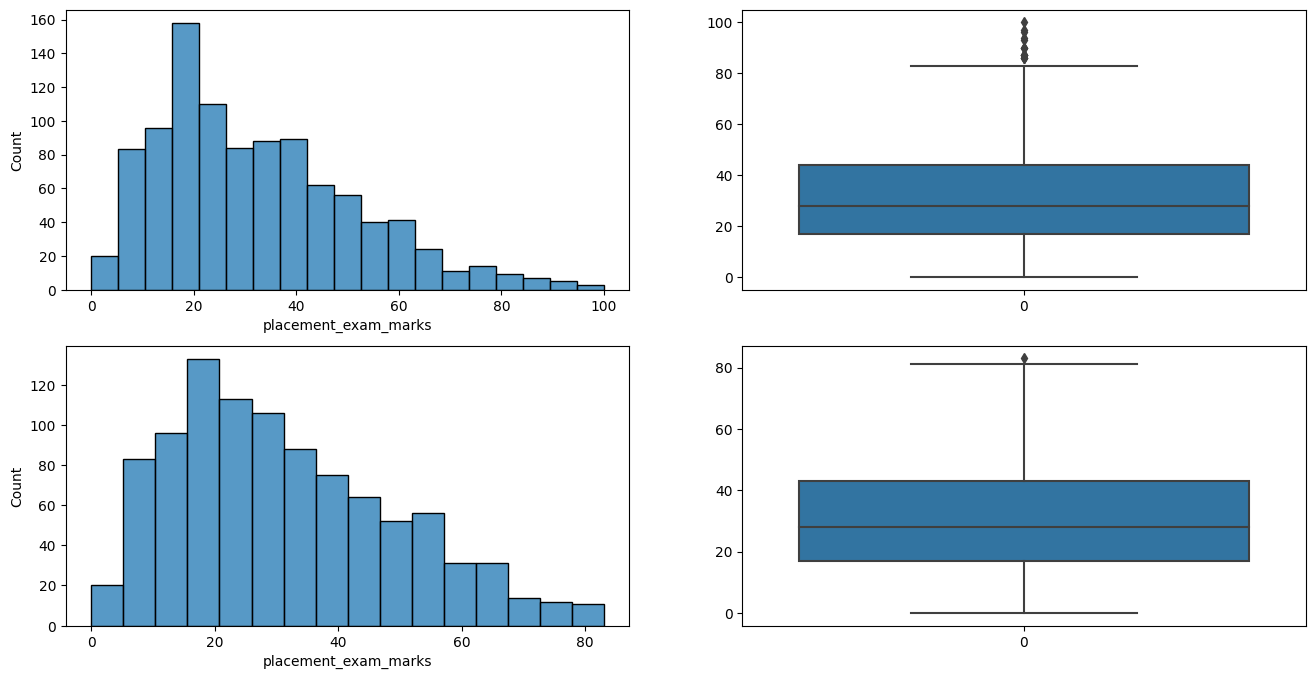

In [39]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

# Capping

In [42]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(df['placement_exam_marks']<lower_limit,
    lower_limit,
    new_df_cap['placement_exam_marks'])
)

In [43]:
new_df_cap.shape

(1000, 3)

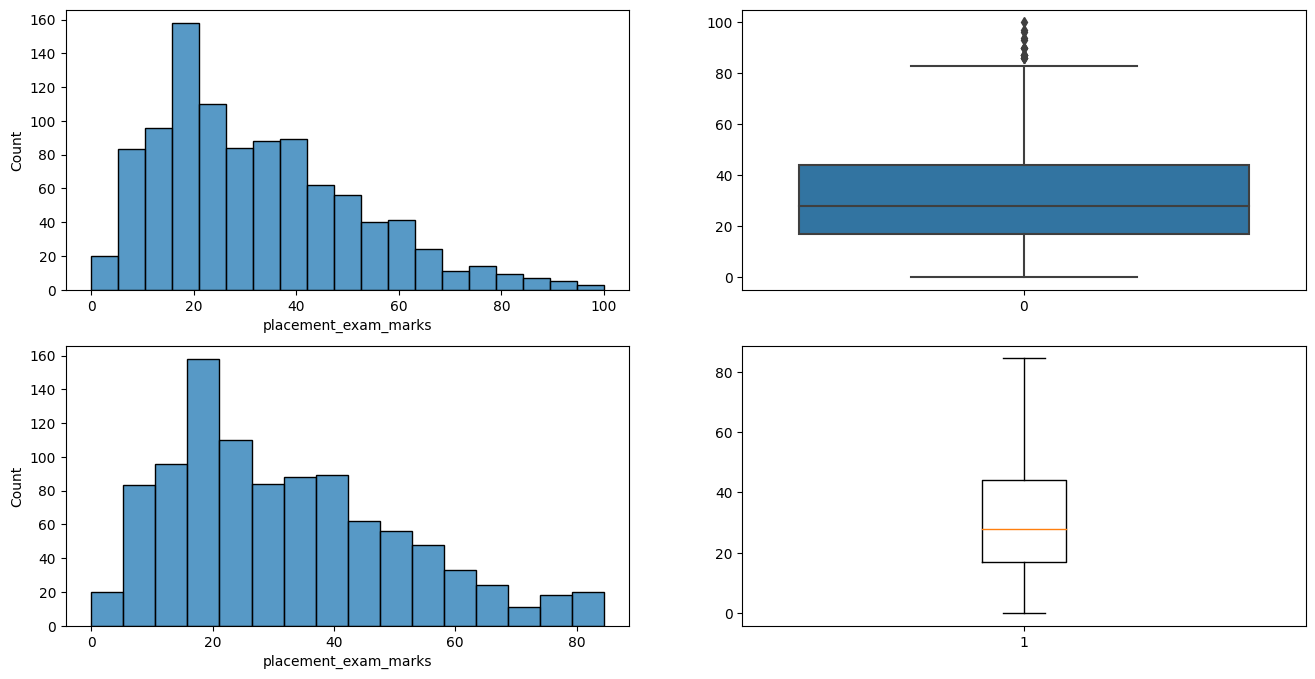

In [45]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
plt.boxplot(new_df_cap['placement_exam_marks'])

plt.show()